
<h1 align="center"><font size="5">House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>


<hr>


# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this project.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## **Import the required libraries**


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
!pip install -U scikit-learn

In [3]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Module 1: Importing Data Sets


Download the dataset by running the cell below.


Load the csv:


In [ ]:
df = pd.read_csv(file_name)

In [4]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=None)

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [5]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.columns

Index([            nan,            'id',          'date',         'price',
            'bedrooms',     'bathrooms',   'sqft_living',      'sqft_lot',
              'floors',    'waterfront',          'view',     'condition',
               'grade',    'sqft_above', 'sqft_basement',      'yr_built',
        'yr_renovated',       'zipcode',           'lat',          'long',
       'sqft_living15',    'sqft_lot15'],
      dtype='object', name=0)

In [6]:
df.head()

,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
5,4.0,1954400510,20150218T000000,510000.0,3.0,2.0,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Assign and Display the data types of each column using the function dtypes.


In [42]:

df['price'] = df['price'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)
df['sqft_living'] = df['sqft_living'].astype(int)
df['sqft_lot'] = df['sqft_lot'].astype(int)
df['floors'] = df['floors'].astype(float)
df['waterfront'] = df['waterfront'].astype(int)
df['view'] = df['view'].astype(int)
df['condition'] = df['condition'].astype(int)
df['grade'] = df['grade'].astype(int)
df['sqft_above'] = df['sqft_above'].astype(int)
df['sqft_basement'] = df['sqft_basement'].astype(int)
df['yr_built'] = df['yr_built'].astype(int)
df['yr_renovated'] = df['yr_renovated'].astype(int)
df['zipcode'] = df['zipcode'].astype(int)
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
df['sqft_living15'] = df['sqft_living15'].astype(int)
df['sqft_lot15'] = df['sqft_lot15'].astype(int)
df.dtypes


0
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int32
sqft_lot           int32
floors           float64
waterfront         int32
view               int32
condition          int32
grade              int32
sqft_above         int32
sqft_basement      int32
yr_built           int32
yr_renovated       int32
zipcode            int32
lat              float64
long             float64
sqft_living15      int32
sqft_lot15         int32
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [8]:
df.describe()

,NaN,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data. Make sure the <code>inplace</code> parameter is set to <code>True</code>. 


In [43]:
first_column = df.columns[0]
df.drop(columns=['id', first_column], axis=1, inplace=True)

KeyError: "['id'] not found in axis"

In [10]:
print(df.describe)

<bound method NDFrame.describe of 0                 date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
1      20141013T000000  221900.0       3.0       1.00         1180      5650   
2      20141209T000000  538000.0       3.0       2.25         2570      7242   
3      20150225T000000  180000.0       2.0       1.00          770     10000   
4      20141209T000000  604000.0       4.0       3.00         1960      5000   
5      20150218T000000  510000.0       3.0       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
21609  20140521T000000  360000.0       3.0       2.50         1530      1131   
21610  20150223T000000  400000.0       4.0       2.50         2310      5813   
21611  20140623T000000  402101.0       2.0       0.75         1020      1350   
21612  20150116T000000  400000.0       3.0       2.50         1600      2388   
21613  20141015T000000  325000.0       2.0       0.75         1020      1076   

0    

We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [12]:
#df.dtypes
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [13]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [14]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a data frame. 


In [44]:

floors_df = df['floors'].value_counts().to_frame()
print(floors_df)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


Use the function <code>boxplot</code> in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers. 


<Axes: xlabel='waterfront', ylabel='price'>

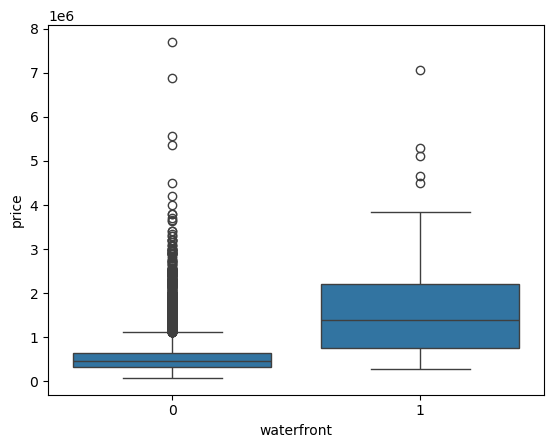

In [16]:
sns.boxplot(x='waterfront', y='price', data=df)

Use the function <code>regplot</code>  in the seaborn library  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.

<Axes: xlabel='sqft_above', ylabel='price'>

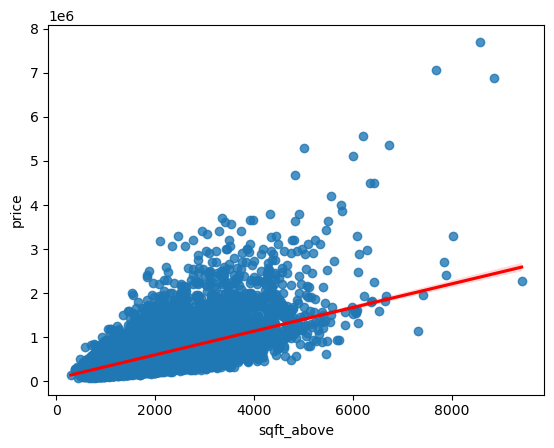

In [45]:

sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color':'red'})

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [18]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

0
zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [19]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Fit a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code> then calculate the R^2. 


In [21]:
X = df[['sqft_living']]
Y = df['price']
lm1 = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [22]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. 


In [25]:
#Enter Your Code, Execute and take the Screenshot
Z=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm2 = LinearRegression()
lm2.fit(Z, Y)
lm2.score(Z, Y)

0.65769516660375

Create a list of tuples, the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>


In [26]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2. Take a screenshot of your code and the value of the R^2. 


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
pipe=Pipeline(Input)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.7513408515988734


# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [32]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 

In [33]:
from sklearn.linear_model import Ridge

In [34]:
RR = Ridge(alpha=0.1)
RR.fit(x_train, y_train)
yhat=RR.predict(x_test)
print(r2_score(y_test,yhat))

0.6478759163939108


Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. 


In [46]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
Rg = Ridge(alpha=0.1)
Rg.fit(x_train_pr,y_train)
print(Rg.score(x_test_pr, y_test))

0.7002744258026403
